<a href="https://colab.research.google.com/github/DPravallika2005/Diabetes-Predictor/blob/main/DiabetesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading Dataset**

In [ ]:
df = pd.read_csv('/content/mod_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,NaN,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,NaN,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print("Original Dataset:")
print(df.head())



Original Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0   NaN   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94   NaN   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Data Preprocessing**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         2
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

**Outlier Analysis**


Outliers:


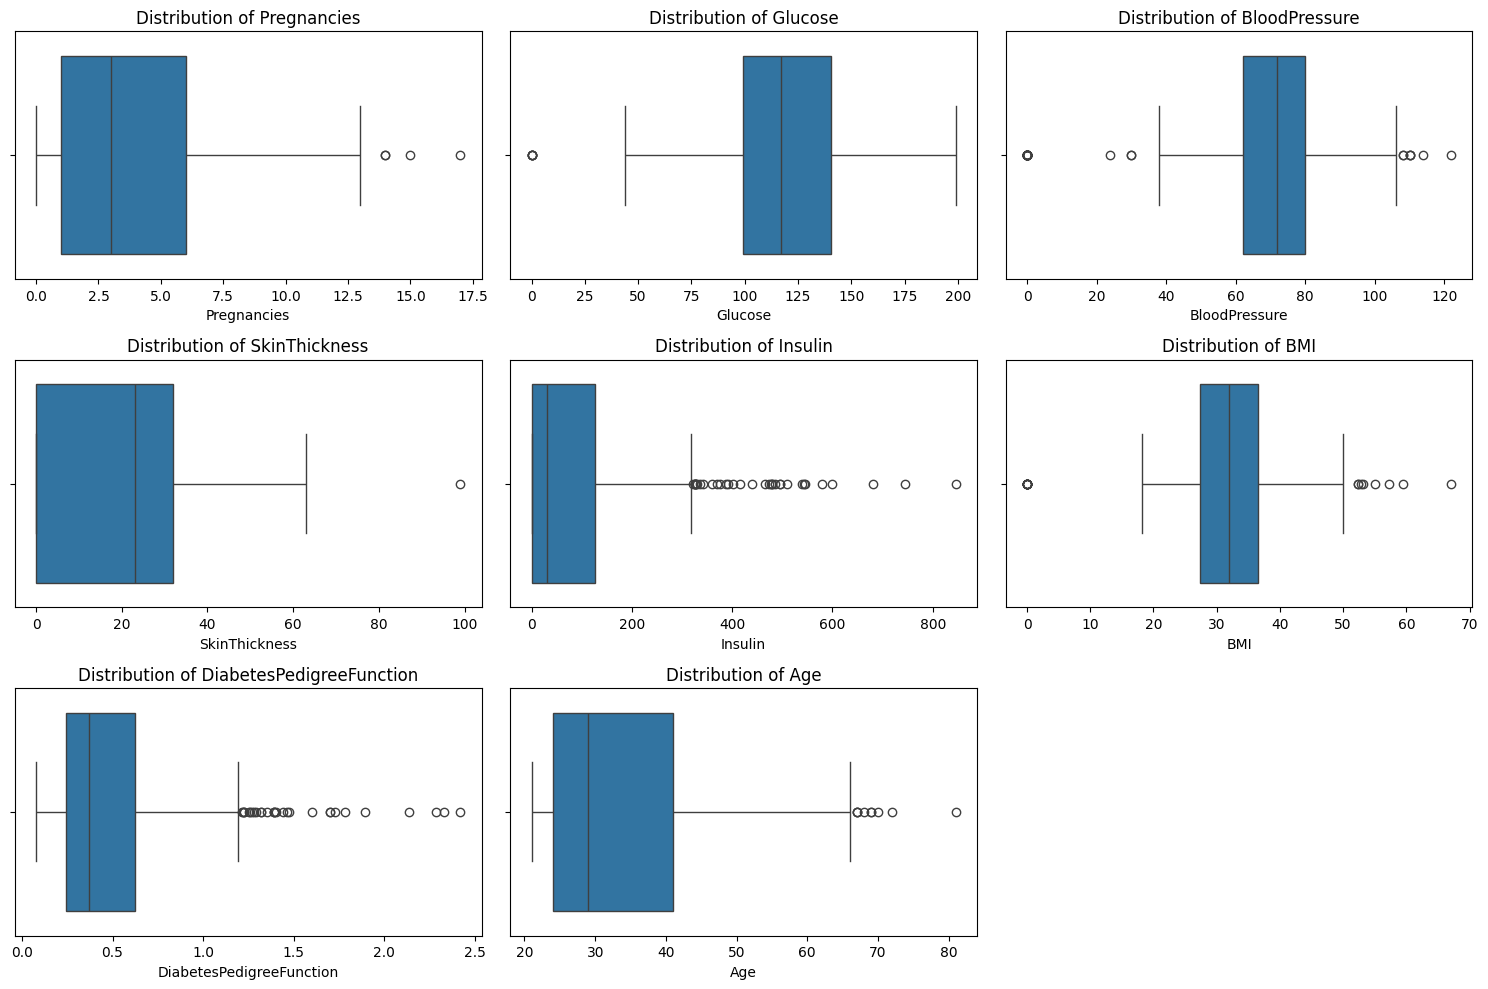

In [ ]:
print("\nOutliers:")

# Visualize distributions of numeric columns using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df = df[(df['BloodPressure'] >= 40) & (df['BloodPressure'] <= 120)]
df = df[(df['SkinThickness'] >= 0) & (df['SkinThickness'] <= 80)]
df = df[(df['Insulin'] >= 0) & (df['Insulin'] <= 600)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.627,50,1
1,1,85,66,29,0,32.0047,0.351,31,0
2,8,183,64,0,0,23.3000,0.672,32,1
3,1,89,66,23,94,32.0047,0.167,21,0
4,0,137,40,35,168,43.1000,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9000,0.171,63,0
764,2,122,70,27,0,36.8000,0.340,27,0
765,5,121,72,23,112,26.2000,0.245,30,0
766,1,126,60,0,0,30.1000,0.349,47,1


In [ ]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


**Cleaned Dataset**

In [ ]:
print("\nCleaned Dataset:")
df


Cleaned Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.627,50,1
1,1,85,66,29,0,32.0047,0.351,31,0
2,8,183,64,0,0,23.3000,0.672,32,1
3,1,89,66,23,94,32.0047,0.167,21,0
4,0,137,40,35,168,43.1000,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9000,0.171,63,0
764,2,122,70,27,0,36.8000,0.340,27,0
765,5,121,72,23,112,26.2000,0.245,30,0
766,1,126,60,0,0,30.1000,0.349,47,1


**Data Shuffling**

In [ ]:

# Shuffle the dataset randomly
shuffled_df = df.sample(frac=1, random_state=42)
df = shuffled_df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
348,3,99,62,19,74,21.8,0.279,26,0
551,3,84,68,30,106,31.9,0.591,25,0
588,3,176,86,27,156,33.3,1.154,52,1
37,9,102,76,37,0,32.9,0.665,46,1
398,3,82,70,0,0,21.1,0.389,25,0
...,...,...,...,...,...,...,...,...,...
77,5,95,72,33,0,37.7,0.370,27,0
115,4,146,92,0,0,31.2,0.539,61,1
288,4,96,56,17,49,20.8,0.340,26,0
462,8,74,70,40,49,35.3,0.705,39,0


**Analyse each attribute with Outcome**

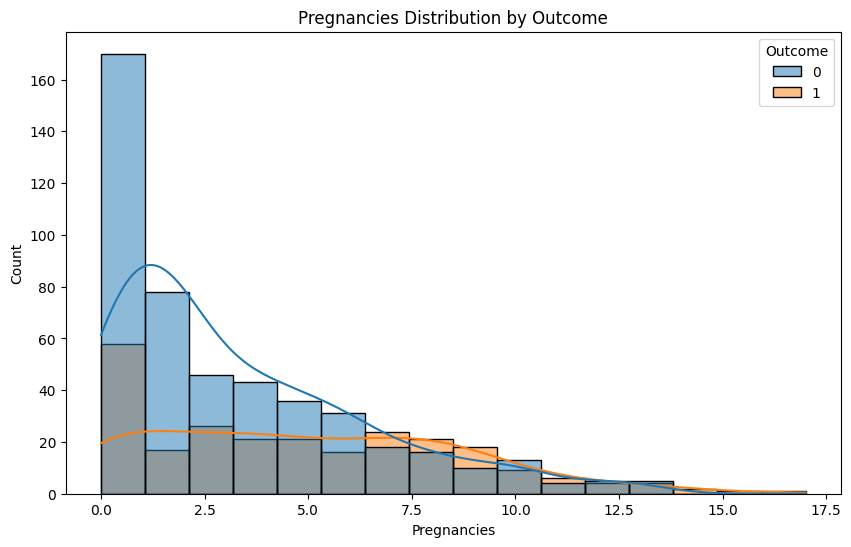

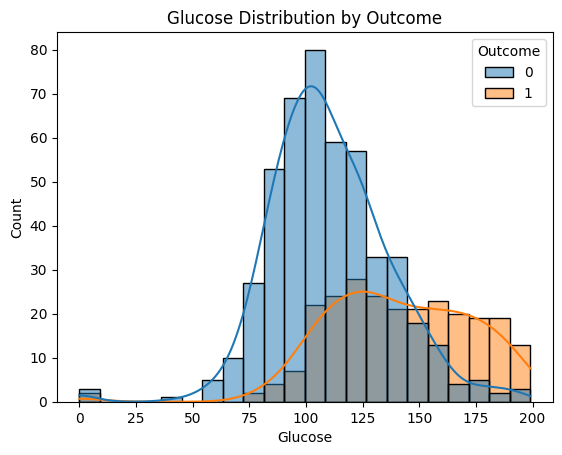

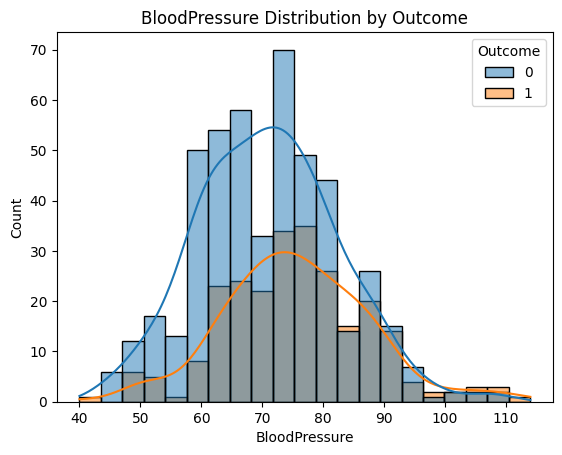

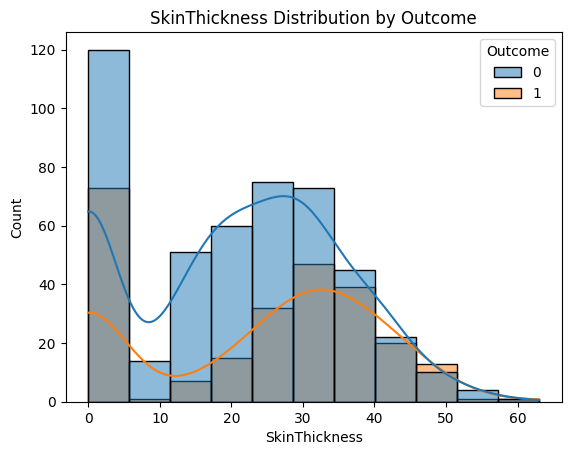

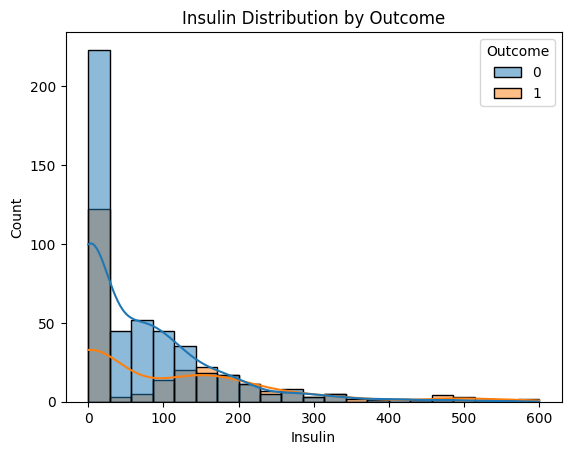

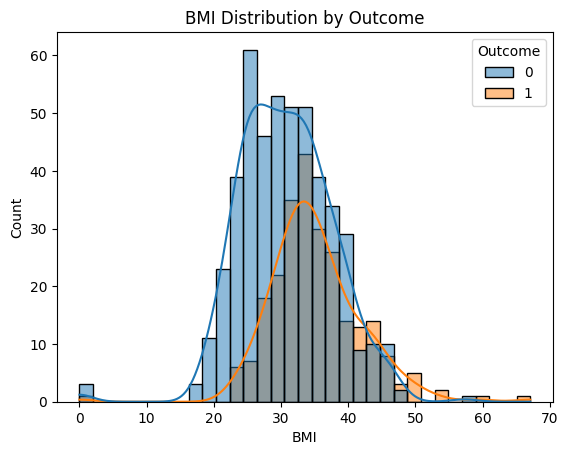

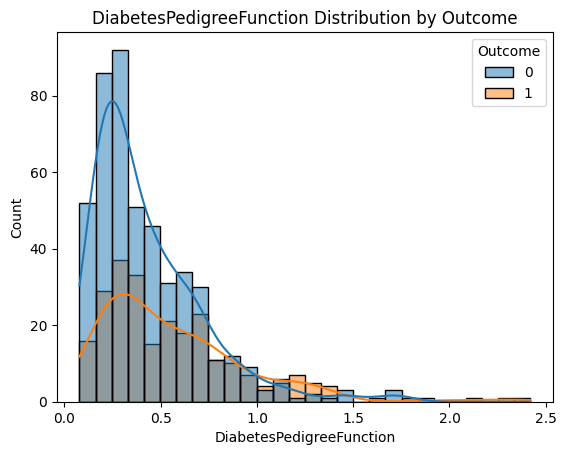

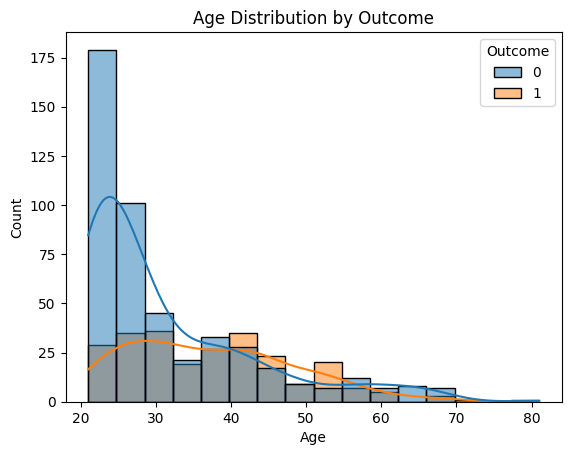

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for col in df.columns[:-1]:  # Exclude the target variable 'outcome'
    sns.histplot(df, x=col, hue='Outcome', kde=True)
    plt.title(f'{col} Distribution by Outcome')
    plt.show()

**Explore relationship between** **attributes**

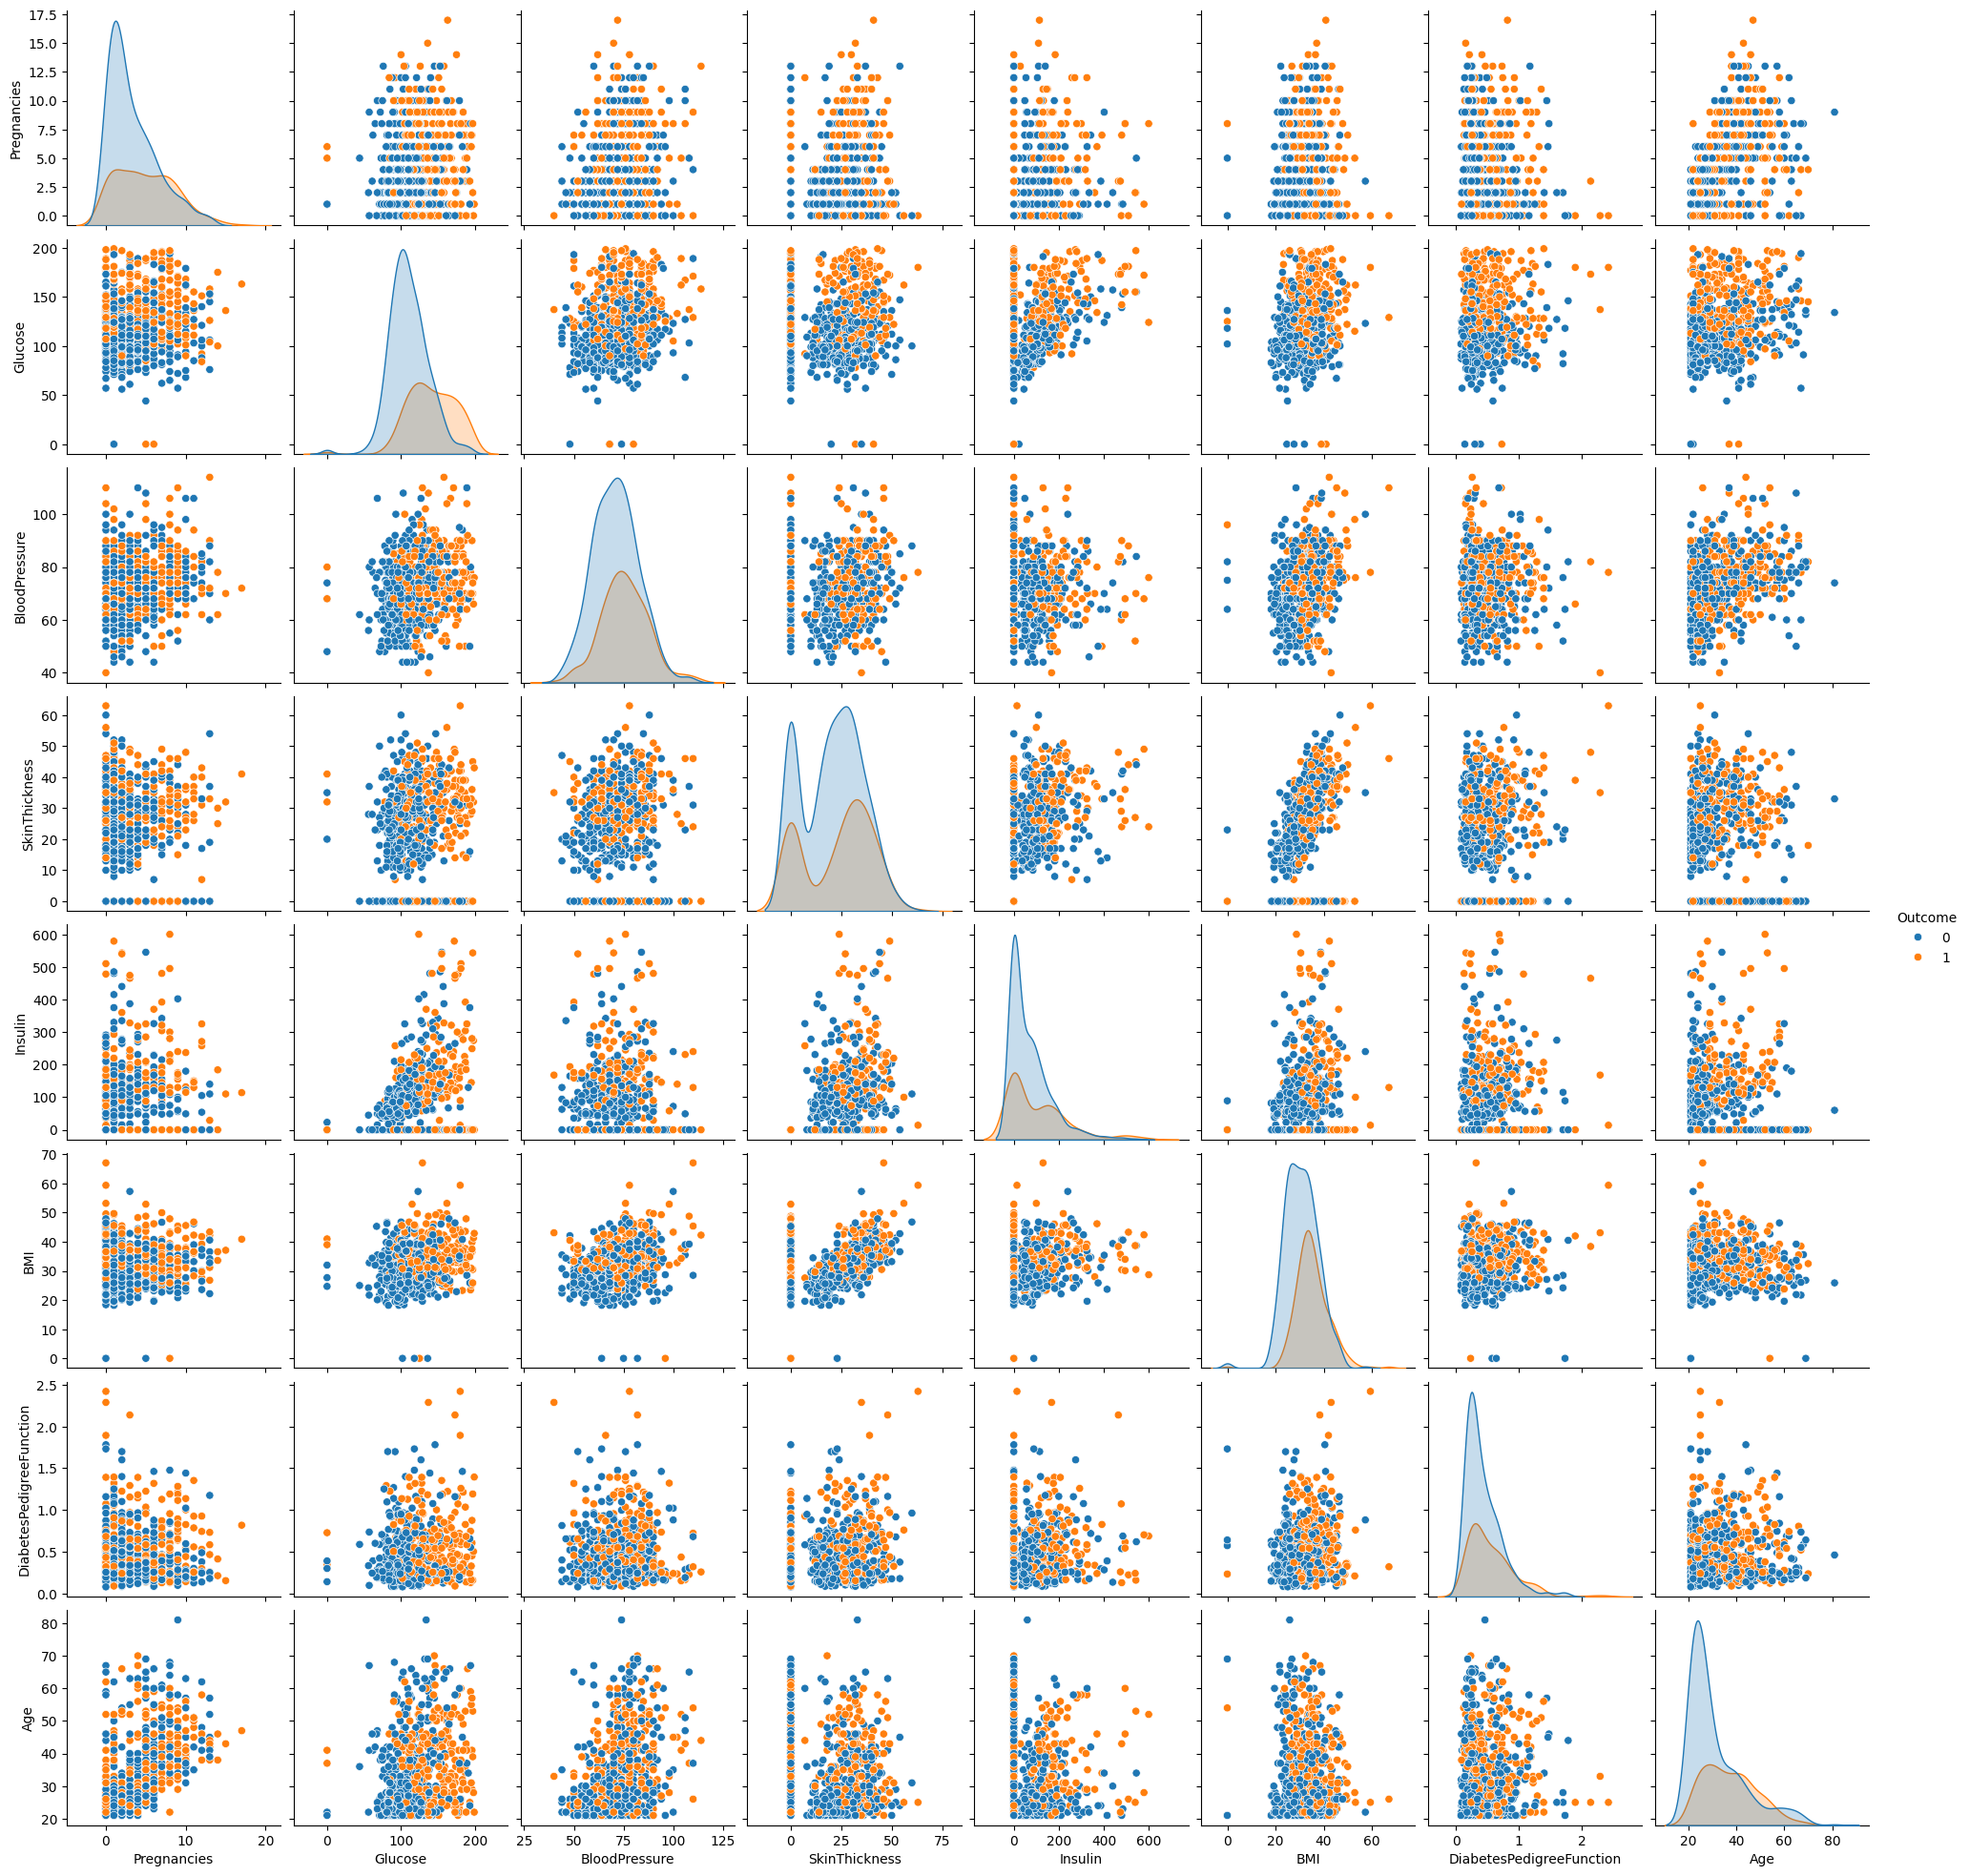

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()


**Correlation Analysis**

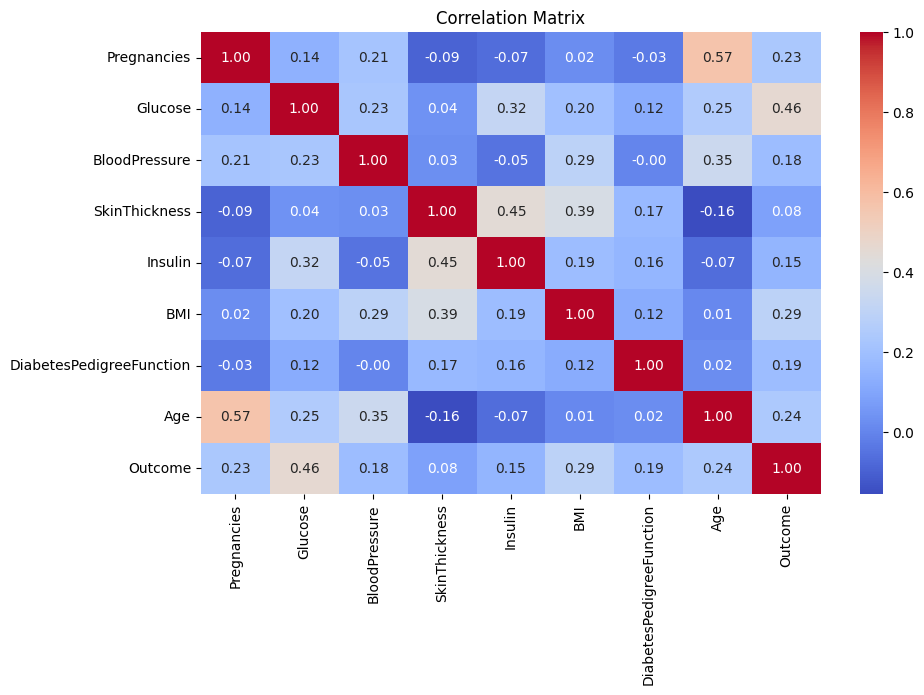

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Training the Model**

**Naive Bayes**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Insulin', 'Age','DiabetesPedigreeFunction']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [70]:
from sklearn.metrics import accuracy_score

# Evaluate on training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7651122625215889


In [71]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.7310344827586207


In [78]:
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({'Pregnancies': [1], 'Glucose': [85], 'BloodPressure': [66], 'BMI': [0], 'Insulin': [0], 'Age': [31], 'DiabetesPedigreeFunction': [0.351]})
prediction = model.predict(new_data)
print("Diabetes Occurrence Prediction:", prediction)


Diabetes Occurrence Prediction: [0]
